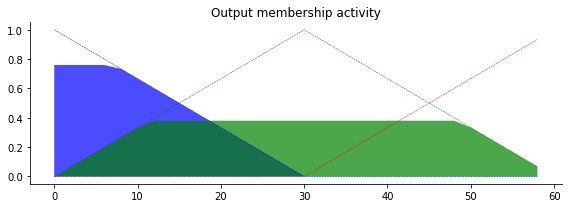

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 50, 2)
x_serv = np.arange(0, 50, 2)
x_tip = np.arange(0, 60, 2)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 25])
qual_md = fuzz.trimf(x_qual, [0, 25, 50])
qual_hi = fuzz.trimf(x_qual, [25, 50, 50])
serv_lo = fuzz.trimf(x_serv, [0, 0, 25])
serv_md = fuzz.trimf(x_serv, [0, 25, 50])
serv_hi = fuzz.trimf(x_serv, [25, 50, 50])
tip_lo = fuzz.trimf(x_tip, [0, 0, 30])
tip_md = fuzz.trimf(x_tip, [0, 30, 60])
tip_hi = fuzz.trimf(x_tip, [30, 60, 60])

# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.0)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.0)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.0)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.5)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.5)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.5)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
